###### NAME : SAKSHI GOYAL
###### ROLLNO : 102103451

# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

### Assignments:

1. Classify all comedian according to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all movies according to Polarity and Subjectivity.


In [2]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
DESPICABLE ME 3,"In the animated adventure Despicable Me 3, Fel...",ELEMENTAL (2023)
ELEMENTAL,"The film journeys alongside an unlikely pair, ...",THE MONKEY KING (2023)
KLAUS,,DESPICABLE ME 3 (2017)
THE BOSS BABY,Tim and his Boss Baby little bro Ted have beco...,KLAUS (2019)
THE MONKEY KING,"Inspired by an epic Chinese tale, THE MONKEY K...",THE BOSS BABY: FAMILY BUSINESS (2021)


In [3]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data


,transcript,full_name,polarity,subjectivity
DESPICABLE ME 3,"In the animated adventure Despicable Me 3, Fel...",ELEMENTAL (2023),0.161368,0.555523
ELEMENTAL,"The film journeys alongside an unlikely pair, ...",THE MONKEY KING (2023),0.133601,0.565781
KLAUS,,DESPICABLE ME 3 (2017),0.000000,0.000000
THE BOSS BABY,Tim and his Boss Baby little bro Ted have beco...,KLAUS (2019),0.147192,0.529160
THE MONKEY KING,"Inspired by an epic Chinese tale, THE MONKEY K...",THE BOSS BABY: FAMILY BUSINESS (2021),0.062499,0.394205


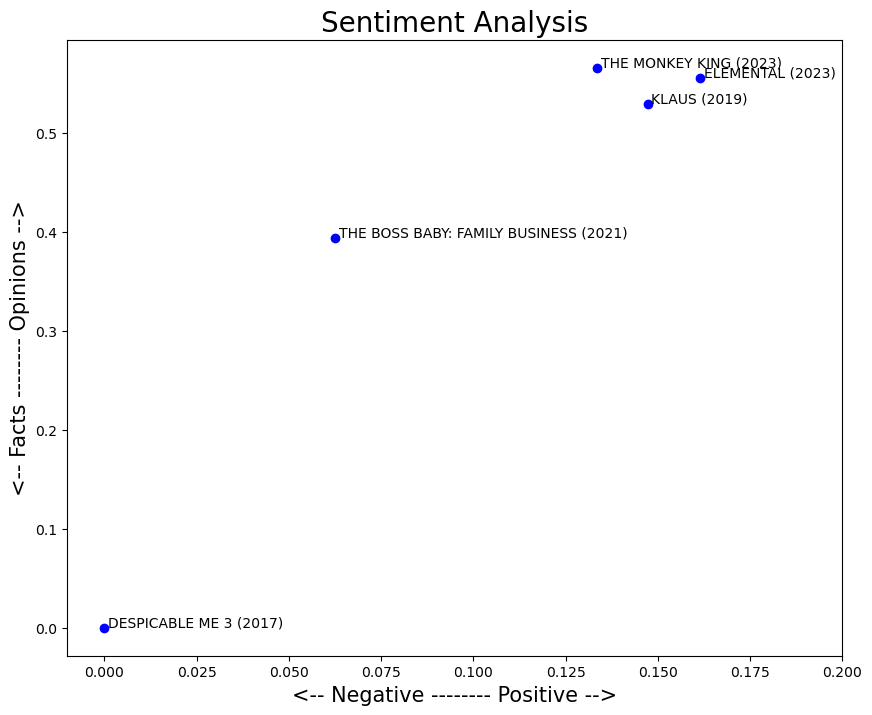

In [6]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .2) 

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()


In [16]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list


In [17]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
DESPICABLE ME 3,"In the animated adventure Despicable Me 3, Fel...",ELEMENTAL (2023),0.153246,0.550489
ELEMENTAL,"The film journeys alongside an unlikely pair, ...",THE MONKEY KING (2023),0.127326,0.561625
KLAUS,When Jesper (Jason Schwartzman) distinguishes ...,DESPICABLE ME 3 (2017),0.165721,0.547933
THE BOSS BABY,Tim and his Boss Baby little bro Ted have beco...,KLAUS (2019),0.142995,0.526671
THE MONKEY KING,"Inspired by an epic Chinese tale, THE MONKEY K...",THE BOSS BABY: FAMILY BUSINESS (2021),0.058932,0.392614


In [18]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces


[['In the animated adventure Despicable Me 3, Felonious Gru and Lucy Wilde, married agents of the Anti-Villain League (AVL), are tasked with thwarting the plans of Balthazar Bratt, a former child star turned villain. After failing to secure Bratt and the stolen Dumont Diamond, they are unceremoniously fired from the AVL. Their personal lives are upended when most of their Minions leave, and Gru discovers he has a twin brother, Dru, who lives in wealth and wishes to become a villain like their father. As Gru grapples with his identity and reluctance to return to villainy, Bratt steals the diamond again to execute his revenge on Hollywood. The brothers eventually team up to stop Bratt, leading to a series of misadventures that test their bond, culminate in a dramatic rescue mission, and finally, bring the family closer together. Despite initial tensions and conflicts, the story ends on a high note with Gru and Lucy’s reinstatement into the AVL and a renewed sense of unity among the chara

In [19]:
# The list has 10 elements, one for each transcript
len(list_pieces)


5

In [20]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])


10

In [21]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript


[[0.015035590277777787,
  0.23246650755371256,
  0.13495905306567074,
  0.2565288725353423,
  0.16240797155551898,
  0.3167080026455026,
  0.09092318318208432,
  0.20984264184397164,
  0.06888088650173611,
  -0.002743415625621983],
 [0.1976750049193231,
  0.16596671075837743,
  -0.02580447454786843,
  0.23216726505416985,
  0.06333793934240364,
  0.12773974686625283,
  0.1663345046157546,
  0.15529350104821807,
  0.14252836681547618,
  0.037142221730289915],
 [0.0694972767933573,
  0.19457263840372796,
  0.051956399210926915,
  0.08519318155902207,
  0.22945231163333776,
  0.18895918457425342,
  0.2763634939621782,
  0.2172568816556158,
  0.10573648009358678,
  0.2524641343279737],
 [0.20933843003202748,
  0.1355851032647907,
  0.1002761385573885,
  0.1280751960462059,
  0.09075560937265523,
  0.2097998334486552,
  0.176938575295841,
  0.0908016196385851,
  0.06308436485389611,
  0.2190761523765352],
 [0.09964035035393297,
  0.051739623015873024,
  0.04889554210997063,
  0.076663803177

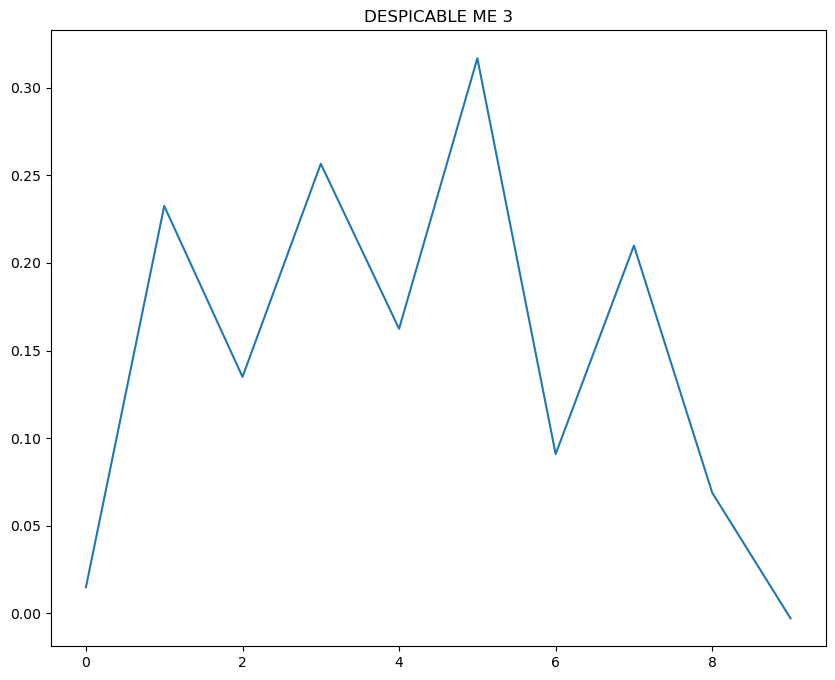

In [22]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()


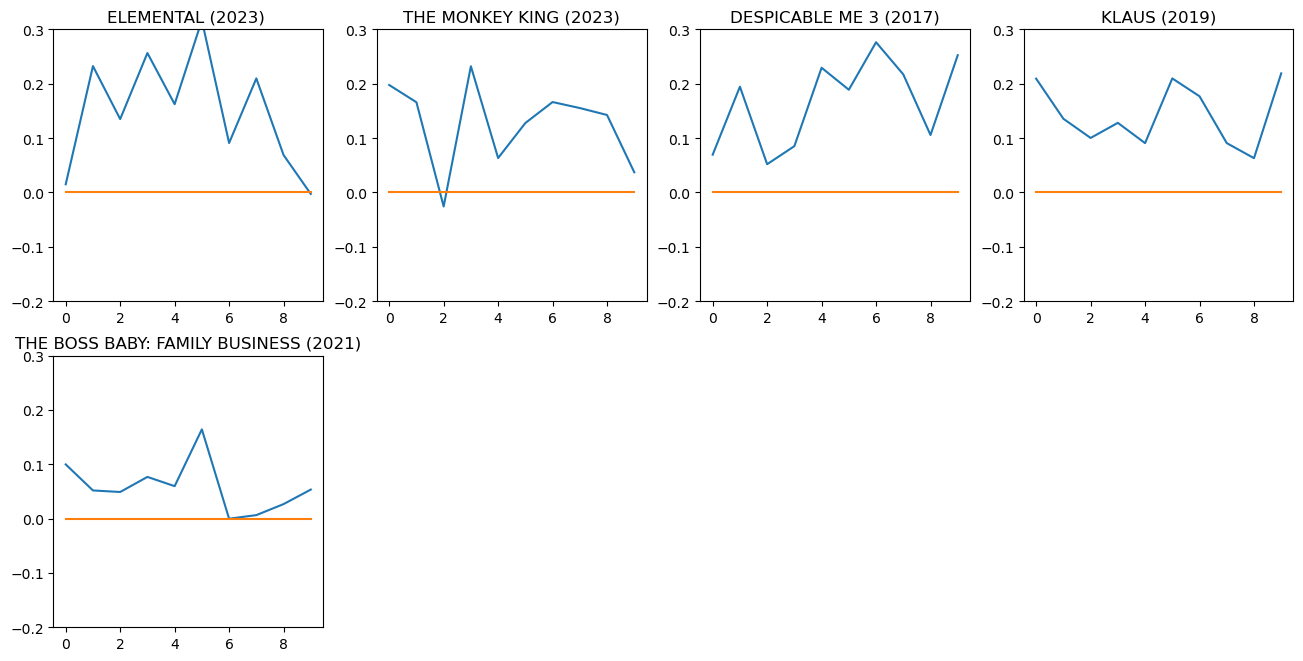

In [23]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()


In [24]:
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)

subjectivity_transcript

[[0.5694603174603176,
  0.5603873865860168,
  0.5044506691565516,
  0.5823877728174603,
  0.609596644564999,
  0.5431804820693712,
  0.5857468123861566,
  0.5238947990543735,
  0.4891741071428572,
  0.49269542717818565],
 [0.6220279089597271,
  0.5302662037037038,
  0.5202465834818777,
  0.5365929705215418,
  0.542670068027211,
  0.524184834576401,
  0.585767242017242,
  0.6190775681341719,
  0.61751495284104,
  0.5224403122130395],
 [0.47591777337540037,
  0.5751669758812614,
  0.5997023809523809,
  0.5755815544608648,
  0.5313670411985021,
  0.5618173258003767,
  0.6621373509531402,
  0.48842174000401845,
  0.4983237894313843,
  0.5366110080395793],
 [0.49040140076725464,
  0.5289049422799426,
  0.4917875342875346,
  0.47333714953549666,
  0.5173936241163131,
  0.5715403449010008,
  0.5697206660441954,
  0.5126597934229514,
  0.5985721500721504,
  0.5187547118414465],
 [0.4490610548681413,
  0.3665498412698413,
  0.33511436070491185,
  0.4012320483749055,
  0.3789490651192779,
  0.48

(0.0, 1.0)

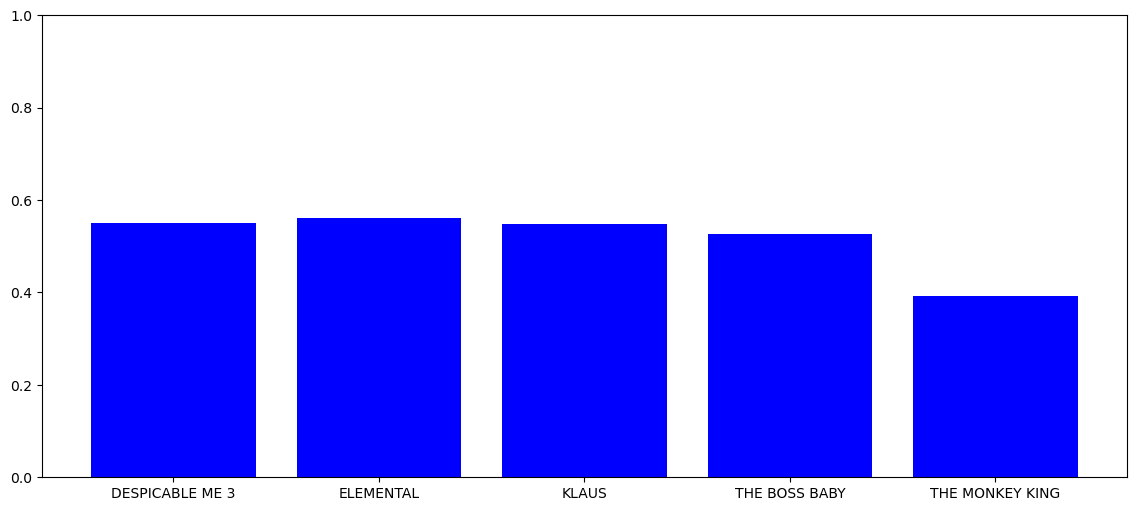

In [25]:
data["subjectivity"]>0.5
plt.figure(figsize=(14,6))
plt.bar(data.index,data["subjectivity"] , color = 'blue')
plt.ylim(0,1)

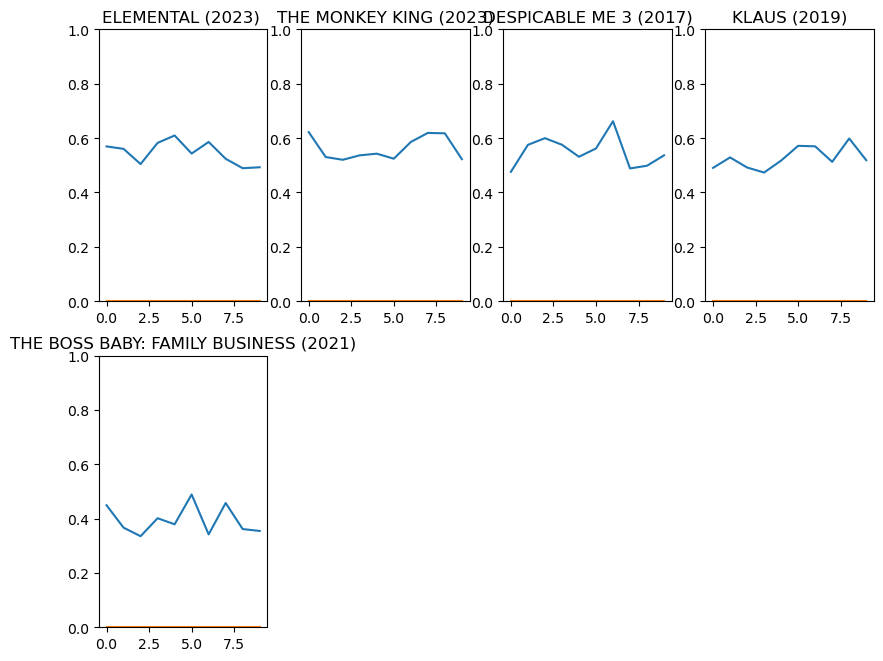

In [26]:
plt.rcParams['figure.figsize'] = [10, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(3, 4, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=0, ymax=1)

plt.show()

### Assignments:
1. Classify all  according to Polarity and Subjectivity.
2. Modify the number of sections the movie routine is split into and see how the charts over time change and again classify all movie accordig to Polarity and Subjectivity.


In [7]:
data['polarity_class'] = data['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
data['subjectivity_class'] = data['subjectivity'].apply(lambda x: 'subjective' if x > 0.5 else 'objective')

data

,transcript,full_name,polarity,subjectivity,polarity_class,subjectivity_class
DESPICABLE ME 3,"In the animated adventure Despicable Me 3, Fel...",ELEMENTAL (2023),0.161368,0.555523,positive,subjective
ELEMENTAL,"The film journeys alongside an unlikely pair, ...",THE MONKEY KING (2023),0.133601,0.565781,positive,subjective
KLAUS,,DESPICABLE ME 3 (2017),0.000000,0.000000,neutral,objective
THE BOSS BABY,Tim and his Boss Baby little bro Ted have beco...,KLAUS (2019),0.147192,0.529160,positive,subjective
THE MONKEY KING,"Inspired by an epic Chinese tale, THE MONKEY K...",THE BOSS BABY: FAMILY BUSINESS (2021),0.062499,0.394205,positive,objective


In [28]:
import numpy as np
import math

def split_text5(text, n=15):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list5 = []
    for piece in range(n):
        split_list5.append(text[start[piece]:start[piece]+size])
    return split_list5

In [29]:
list_pieces5 = []
for t in data.transcript:
    split5 = split_text5(t)
    list_pieces5.append(split5)

list_pieces5

[['In the animated adventure Despicable Me 3, Felonious Gru and Lucy Wilde, married agents of the Anti-Villain League (AVL), are tasked with thwarting the plans of Balthazar Bratt, a former child star turned villain. After failing to secure Bratt and the stolen Dumont Diamond, they are unceremoniously fired from the AVL. Their personal lives are upended when most of their Minions leave, and Gru discovers he has a twin brother, Dru, who lives in wealth and wishes to become a villain like their father. As Gru grapples with his identity and reluctance to return to villainy, Bratt steals the diamond again to execute his revenge on Hollywood. The brothers eventually team up to stop Bratt, leading to a series of misadventures that test their bond, culminate in a dramatic rescue mission, and finally, bring the family closer together. Despite initial tensions and conflicts, the story ends on a high note with Gru and Lucy’s reinstatement into the AVL and a renewed sense of unity among the chara

In [30]:
polarity_transcript = []
for lp in list_pieces5:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.01987903225806453,
  0.09981060606060609,
  0.2661966961470288,
  0.13740830928330933,
  0.23802083333333332,
  0.20346770671583855,
  0.181567889575702,
  0.15449585137085137,
  0.34000207641196,
  0.052887724100056696,
  0.19978743912337665,
  0.20781757305194803,
  0.015790330317982465,
  0.05719574652777779,
  0.0337039414074298],
 [0.3155424950563839,
  0.053164940218511654,
  0.18344444444444444,
  -0.10564198532948539,
  0.19299947843720822,
  0.18989008980785296,
  0.05109396566597655,
  0.1320183629007158,
  0.10629992527313957,
  0.15897653482880753,
  0.1786992521367521,
  0.15372807017543866,
  0.1504482886904762,
  0.07729371624228396,
  0.04659760934819899],
 [0.04512206120437827,
  0.18400336051259344,
  0.17668799198035035,
  0.03901751342520704,
  0.11889585171140345,
  0.05659529904829159,
  0.18884245637175323,
  0.2058596046443268,
  0.25813061215404964,
  0.19545235170235173,
  0.31896802325581397,
  0.21372590702947838,
  0.13908709154885915,
  0.1265263166657

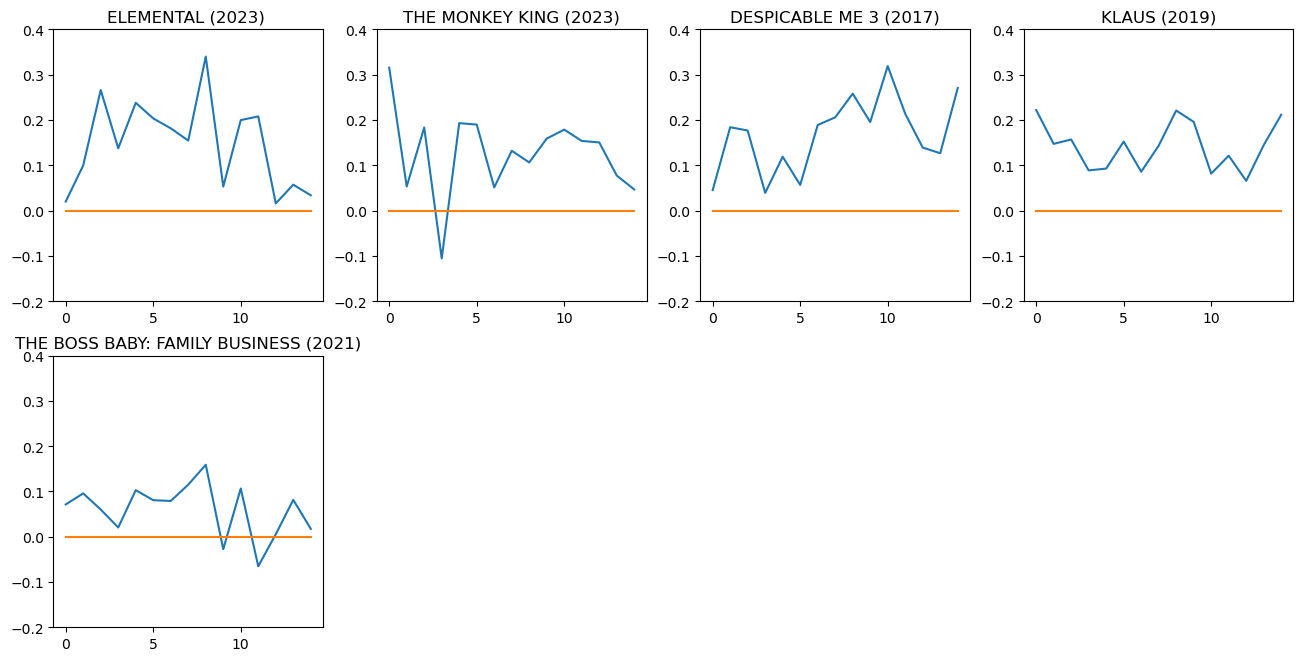

In [31]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,15), np.zeros(15))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.4)

plt.show()

more polarity - claus
less polarity - monkey king

In [32]:
import pprint

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

# Calculate polarity and subjectivity for each comedian's routine
polarity_transcript_new = []
subjectivity_transcript_new = []

for pieces in list_pieces5:
    polarities = [pol(piece) for piece in pieces]
    subjectivities = [sub(piece) for piece in pieces]
    polarity_transcript_new.append(polarities)
    subjectivity_transcript_new.append(subjectivities)

# Calculate average polarity and subjectivity for each comedian
avg_polarity = [np.mean(polarities) for polarities in polarity_transcript_new]
avg_subjectivity = [np.mean(subjectivities) for subjectivities in subjectivity_transcript_new]

# Classify comedians based on average polarity
new_polarity_class = ['positive' if polarity > 0 else ('negative' if polarity < 0 else 'neutral') for polarity in avg_polarity]

# Classify comedians based on average subjectivity
new_subjectivity_class = ['objective' if subjectivity > 0.5 else 'subjective' for subjectivity in avg_subjectivity]

# Update the DataFrame with polarity and subjectivity classifications
data['avg_polarity'] = avg_polarity
data['avg_subjectivity'] = avg_subjectivity

data['new_polarity_class'] = new_polarity_class
data['new_subjectivity_class'] = new_subjectivity_class

# Display the updated DataFrame
pprint.pprint(data)

                                                        transcript  \
DESPICABLE ME 3  In the animated adventure Despicable Me 3, Fel...   
ELEMENTAL        The film journeys alongside an unlikely pair, ...   
KLAUS            When Jesper (Jason Schwartzman) distinguishes ...   
THE BOSS BABY    Tim and his Boss Baby little bro Ted have beco...   
THE MONKEY KING  Inspired by an epic Chinese tale, THE MONKEY K...   

                                             full_name  polarity  \
DESPICABLE ME 3                      ELEMENTAL (2023)   0.153246   
ELEMENTAL                       THE MONKEY KING (2023)  0.127326   
KLAUS                           DESPICABLE ME 3 (2017)  0.165721   
THE BOSS BABY                             KLAUS (2019)  0.142995   
THE MONKEY KING  THE BOSS BABY: FAMILY BUSINESS (2021)  0.058932   

                 subjectivity polarity_class subjectivity_class  avg_polarity  \
DESPICABLE ME 3      0.550489       positive          objective      0.147202   
ELEMENTA

In [33]:
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)

subjectivity_transcript

[[0.5694603174603176,
  0.5603873865860168,
  0.5044506691565516,
  0.5823877728174603,
  0.609596644564999,
  0.5431804820693712,
  0.5857468123861566,
  0.5238947990543735,
  0.4891741071428572,
  0.49269542717818565],
 [0.6220279089597271,
  0.5302662037037038,
  0.5202465834818777,
  0.5365929705215418,
  0.542670068027211,
  0.524184834576401,
  0.585767242017242,
  0.6190775681341719,
  0.61751495284104,
  0.5224403122130395],
 [0.47591777337540037,
  0.5751669758812614,
  0.5997023809523809,
  0.5755815544608648,
  0.5313670411985021,
  0.5618173258003767,
  0.6621373509531402,
  0.48842174000401845,
  0.4983237894313843,
  0.5366110080395793],
 [0.49040140076725464,
  0.5289049422799426,
  0.4917875342875346,
  0.47333714953549666,
  0.5173936241163131,
  0.5715403449010008,
  0.5697206660441954,
  0.5126597934229514,
  0.5985721500721504,
  0.5187547118414465],
 [0.4490610548681413,
  0.3665498412698413,
  0.33511436070491185,
  0.4012320483749055,
  0.3789490651192779,
  0.48

subjective - monkey king

objective - elemental , claus , boss baby , despecible me 3